In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965


In [3]:
del df["Lat"]
del df["Long"]

In [4]:
countries_df = df[["Province/State","Country/Region"]]
countries_df.head()

,Province/State,Country/Region
0,NaN,Afghanistan
1,NaN,Albania
2,NaN,Algeria
3,NaN,Andorra
4,NaN,Angola


In [5]:
days_df = df.copy()
del days_df["Province/State"]
del days_df["Country/Region"]

In [6]:
days_df = days_df.stack().reset_index()
days_df.columns=["country_id", "date", "count"]
days_df.head()

,country_id,date,count
0,0,1/22/20,0
1,0,1/23/20,0
2,0,1/24/20,0
3,0,1/25/20,0
4,0,1/26/20,0


In [7]:
df = pd.merge(countries_df, days_df, left_index=True, right_on="country_id")
del df["country_id"]
df["date"] = pd.to_datetime(df["date"])
df.head()

,Province/State,Country/Region,date,count
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Afghanistan,2020-01-23,0
2,NaN,Afghanistan,2020-01-24,0
3,NaN,Afghanistan,2020-01-25,0
4,NaN,Afghanistan,2020-01-26,0


In [8]:
global_df = df.groupby(["date"],as_index=False).sum("count")

In [9]:
global_df.tail()

,date,count
522,2021-06-27,181093841
523,2021-06-28,181425785
524,2021-06-29,181810531
525,2021-06-30,182202370
526,2021-07-01,182641391


In [10]:
latest_date_str = global_df.date.max().strftime("%Y-%m-%d")

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [12]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [13]:
#plt.figure(figsize=(9.5,5))
#plt.bar(global_df["date"],global_df["count"]/1000,label="positive")
#plt.legend()

In [14]:
trans = pd.DataFrame()
trans["date"] = global_df.iloc[1:]["date"]
trans["count1"] = global_df["count"].iloc[1:]
trans = trans.reset_index().drop(columns="index")
trans["count"] = trans["count1"] - global_df["count"].iloc[0:]
del trans["count1"]
trans["move_ave7"] = trans["count"].rolling(7).mean()


In [15]:
trans.tail()

,date,count,move_ave7
521,2021-06-27,309889.0,372146.142857
522,2021-06-28,331944.0,377089.428571
523,2021-06-29,384746.0,378890.714286
524,2021-06-30,391839.0,372402.714286
525,2021-07-01,439021.0,377428.285714


<IPython.core.display.Javascript object>


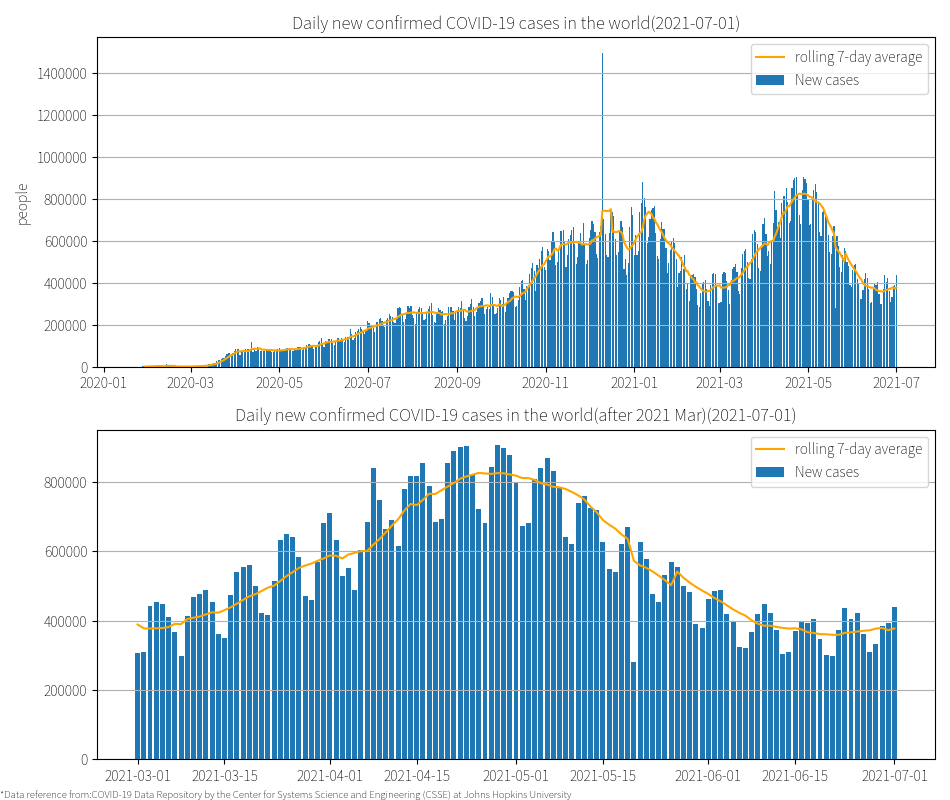

In [16]:
fig=plt.figure(figsize=(9.5,8))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.bar(trans["date"],trans["count"],label="New cases")
plt.plot_date(trans["date"],trans["move_ave7"],label="rolling 7-day average", fmt="-", color="orange")
plt.title("Daily new confirmed COVID-19 cases in the world({})".format(latest_date_str))
plt.ylabel("people")
plt.grid(axis="y")
plt.legend()

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.title("Daily new confirmed COVID-19 cases in the world(after 2021 Mar)({})".format(latest_date_str))
chart_data = trans[trans.date >= "2021-03-01"]
plt.bar(chart_data["date"],chart_data["count"],label="New cases")
plt.plot_date(chart_data["date"],chart_data["move_ave7"],label="rolling 7-day average", fmt="-", color="orange")
plt.grid(axis="y")
plt.legend()
#plt.legend(bbox_to_anchor=(0, 1),loc='upper left', fontsize=9)
fig.text(0,0
         ,"*Data reference from:COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University",
        fontsize=7,ha="left",va="bottom")

fig.tight_layout()

In [17]:
fig.savefig("out/covid-global-transition.png")

## 国別

In [18]:
df.tail()

,Province/State,Country/Region,date,count
147028,NaN,Zimbabwe,2021-06-27,46442
147029,NaN,Zimbabwe,2021-06-28,47284
147030,NaN,Zimbabwe,2021-06-29,48533
147031,NaN,Zimbabwe,2021-06-30,49864
147032,NaN,Zimbabwe,2021-07-01,51221


### 中国の合計行を追加する

In [19]:
china_sum = df[df["Country/Region"]=="China"].groupby("date", as_index=False).sum("count")
china_sum

,date,count
0,2020-01-22,548
1,2020-01-23,643
2,2020-01-24,920
3,2020-01-25,1406
4,2020-01-26,2075
...,...,...
522,2021-06-27,103724
523,2021-06-28,103745
524,2021-06-29,103755
525,2021-06-30,103769


In [20]:
import numpy as np
china_sum.insert(0,"Country/Region","China")
china_sum.insert(0,"Province/State",np.nan)
china_sum

,Province/State,Country/Region,date,count
0,NaN,China,2020-01-22,548
1,NaN,China,2020-01-23,643
2,NaN,China,2020-01-24,920
3,NaN,China,2020-01-25,1406
4,NaN,China,2020-01-26,2075
...,...,...,...,...
522,NaN,China,2021-06-27,103724
523,NaN,China,2021-06-28,103745
524,NaN,China,2021-06-29,103755
525,NaN,China,2021-06-30,103769


In [21]:
df = pd.concat([df,china_sum])

### 国別新規陽性者数

In [22]:
trans = df.copy()
trans["inc_count"] = trans["count"].diff()
# 最小の日付は一律ゼロにする
trans.loc[trans["date"]==trans["date"].min(),"inc_count"] = 0

In [23]:
## 異常値？の訂正
import numpy as np
trans.loc[(trans["Country/Region"]=="France") & (trans.inc_count < -300000),"inc_count"]=np.nan

#### 移動平均

In [24]:
# "Province/State"と"Country/Region"の結合列を作ってユニークにする
trans["country_key"]=trans["Province/State"].fillna("NA")+"-"+trans["Country/Region"]
if trans["country_key"].isna().any():
    raise Exception("include NaN")
for k in trans.country_key.unique():
    print(k,end=",")
    trans.loc[trans.country_key==k,"cnt_move_ave7"] = trans.loc[trans.country_key==k,"count"].rolling(7).mean()
    trans.loc[trans.country_key==k,"inc_move_ave7"] = trans.loc[trans.country_key==k,"inc_count"].rolling(7).mean()

pd.concat([trans[trans.country_key=="NA-Afghanistan"].tail(3),trans[trans.country_key=="NA-Albania"].head(3)])

NA-Afghanistan,NA-Albania,NA-Algeria,NA-Andorra,NA-Angola,NA-Antigua and Barbuda,NA-Argentina,NA-Armenia,Australian Capital Territory-Australia,New South Wales-Australia,Northern Territory-Australia,Queensland-Australia,South Australia-Australia,Tasmania-Australia,Victoria-Australia,Western Australia-Australia,NA-Austria,NA-Azerbaijan,NA-Bahamas,NA-Bahrain,NA-Bangladesh,NA-Barbados,NA-Belarus,NA-Belgium,NA-Belize,NA-Benin,NA-Bhutan,NA-Bolivia,NA-Bosnia and Herzegovina,NA-Botswana,NA-Brazil,NA-Brunei,NA-Bulgaria,NA-Burkina Faso,NA-Burma,NA-Burundi,NA-Cabo Verde,NA-Cambodia,NA-Cameroon,Alberta-Canada,British Columbia-Canada,Diamond Princess-Canada,Grand Princess-Canada,Manitoba-Canada,New Brunswick-Canada,Newfoundland and Labrador-Canada,Northwest Territories-Canada,Nova Scotia-Canada,Nunavut-Canada,Ontario-Canada,Prince Edward Island-Canada,Quebec-Canada,Repatriated Travellers-Canada,Saskatchewan-Canada,Yukon-Canada,NA-Central African Republic,NA-Chad,NA-Chile,Anhui-China,Beijing-China,

,Province/State,Country/Region,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7
524,NaN,Afghanistan,2021-06-29,117158,1407.0,NA-Afghanistan,112167.714286,1629.857143
525,NaN,Afghanistan,2021-06-30,118659,1501.0,NA-Afghanistan,113696.571429,1528.857143
526,NaN,Afghanistan,2021-07-01,120216,1557.0,NA-Afghanistan,115222.857143,1526.285714
527,NaN,Albania,2020-01-22,0,0.0,NA-Albania,NaN,NaN
528,NaN,Albania,2020-01-23,0,0.0,NA-Albania,NaN,NaN
529,NaN,Albania,2020-01-24,0,0.0,NA-Albania,NaN,NaN


In [25]:
trans["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

## 人口当たり

In [26]:
pop = pd.read_excel("world-data/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx",header=16)
pop_latest = pop.loc[pop["Type"]=="Country/Area"][[pop.columns[2],pop.columns[-1]]]
pop_latest.columns = ["un_country","population"]
pop_latest.head(1)

,un_country,population
26,Burundi,11890.781


### 名称変換

In [27]:
alternates = pd.DataFrame([
    ("US","United States of America"),
    ("Russia","Russian Federation"),
    ("Iran","Iran (Islamic Republic of)"),
    ("Bolivia","Bolivia (Plurinational State of)"),
    ("Moldova","Republic of Moldova"),
    ("Venezuela","Venezuela (Bolivarian Republic of)"),
    ("Korea, South","Republic of Korea"),
    ("Congo (Kinshasa)","Democratic Republic of the Congo"),
    ("Congo (Brazzaville)","Congo"),
    ("Vietnam","Viet Nam"),
    ("Laos","Lao People's Democratic Republic"),
    ("Taiwan*","China, Taiwan Province of China"),
    ("Tanzania","United Republic of Tanzania"),
    ("Brunei","Brunei Darussalam"),
    ("Micronesia","Micronesia (Fed. States of)"),
    ("Syria","Syrian Arab Republic"),
], columns = ["covid_country","un_country"])

In [28]:
alternates.head(2)

,covid_country,un_country
0,US,United States of America
1,Russia,Russian Federation


In [29]:
trans_pop = pd.merge(trans, alternates, left_on="Country/Region", right_on="covid_country", how="left")
del trans_pop["covid_country"]
trans_pop.rename(columns={"Country/Region":"country"},inplace=True)

In [30]:
trans_pop.head()

,Province/State,country,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country
0,NaN,Afghanistan,2020-01-22,0,0.0,NA-Afghanistan,NaN,NaN,NaN
1,NaN,Afghanistan,2020-01-23,0,0.0,NA-Afghanistan,NaN,NaN,NaN
2,NaN,Afghanistan,2020-01-24,0,0.0,NA-Afghanistan,NaN,NaN,NaN
3,NaN,Afghanistan,2020-01-25,0,0.0,NA-Afghanistan,NaN,NaN,NaN
4,NaN,Afghanistan,2020-01-26,0,0.0,NA-Afghanistan,NaN,NaN,NaN


In [31]:
trans_pop.isnull().any(axis=0)

Province/State     True
country           False
date              False
count             False
inc_count          True
country_key       False
cnt_move_ave7      True
inc_move_ave7      True
un_country         True
dtype: bool

In [32]:
trans_pop["un_country"].fillna(trans_pop["country"],inplace=True)

In [33]:
trans_pop.isnull().any(axis=0)

Province/State     True
country           False
date              False
count             False
inc_count          True
country_key       False
cnt_move_ave7      True
inc_move_ave7      True
un_country        False
dtype: bool

In [34]:
trans_pop = pd.merge(trans_pop, pop_latest, on="un_country", how="left")

In [35]:
trans_pop.head()

,Province/State,country,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population
0,NaN,Afghanistan,2020-01-22,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341
1,NaN,Afghanistan,2020-01-23,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341
2,NaN,Afghanistan,2020-01-24,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341
3,NaN,Afghanistan,2020-01-25,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341
4,NaN,Afghanistan,2020-01-26,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341


In [36]:
trans_pop["count_per_mil_pop"] = trans_pop["count"] / (trans_pop["population"] / 1000)
trans_pop["inc_count_per_mil_pop"] = trans_pop["inc_count"] / (trans_pop["population"] / 1000)
trans_pop["cnt_move_ave7_milpop"] = trans_pop["cnt_move_ave7"] / (trans_pop["population"] / 1000)
trans_pop["inc_move_ave7_milpop"] = trans_pop["inc_move_ave7"] / (trans_pop["population"] / 1000)

In [37]:
pd.concat([trans_pop.head(),trans_pop.tail()])

,Province/State,country,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
0,NaN,Afghanistan,2020-01-22,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
1,NaN,Afghanistan,2020-01-23,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
2,NaN,Afghanistan,2020-01-24,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
3,NaN,Afghanistan,2020-01-25,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
4,NaN,Afghanistan,2020-01-26,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
147555,NaN,China,2021-06-27,103724,28.0,NA-China,103649.142857,25.857143,China,1439323.774,72.064397,0.019454,72.012389,0.017965
147556,NaN,China,2021-06-28,103745,21.0,NA-China,103674.000000,24.857143,China,1439323.774,72.078987,0.01459,72.029659,0.01727
147557,NaN,China,2021-06-29,103755,10.0,NA-China,103695.857143,21.857143,China,1439323.774,72.085935,0.006948,72.044844,0.015186
147558,NaN,China,2021-06-30,103769,14.0,NA-China,103717.142857,21.285714,China,1439323.774,72.095662,0.009727,72.059633,0.014789
147559,NaN,China,2021-07-01,103791,22.0,NA-China,103737.142857,20.000000,China,1439323.774,72.110947,0.015285,72.073528,0.013895


In [38]:
trans_pop.loc[trans_pop["country"]=="Japan"].tail()


,Province/State,country,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
82207,NaN,Japan,2021-06-27,796077,1272.0,NA-Japan,791410.714286,1482.142857,Japan,126476.458,6294.270195,10.057208,6257.375695,11.718725
82208,NaN,Japan,2021-06-28,797084,1007.0,NA-Japan,792913.285714,1502.571429,Japan,126476.458,6302.232151,7.961956,6269.255941,11.880246
82209,NaN,Japan,2021-06-29,798485,1401.0,NA-Japan,794409.857143,1496.571429,Japan,126476.458,6313.309312,11.07716,6281.088747,11.832806
82210,NaN,Japan,2021-06-30,800305,1820.0,NA-Japan,795912.428571,1502.571429,Japan,126476.458,6327.699341,14.39003,6292.968993,11.880246
82211,NaN,Japan,2021-07-01,802038,1733.0,NA-Japan,797424.714286,1512.285714,Japan,126476.458,6341.401496,13.702155,6304.926046,11.957053


### 主要国の定義

In [39]:
"""
countries = pd.DataFrame({"country":[
    "Japan",
    "US",
    "India",
    "Sweden",
    "Brazil",
    "Israel",
    "United Kingdom",
    "France",
    "Russia",
]})
"""
countries = pd.DataFrame([
    ("Japan",""),
    ("US",""),
    ("India","20210415"),
    ("Sweden","20210511"),
    ("Brazil",""),
    ("Israel","20210315"),
    ("United Kingdom",""),
    ("France","20210425"),
    ("Russia",""),
],columns=["country","text_disp_date"])

In [40]:
#c_df = pd.merge(countries, trans_pop[trans_pop["Province/State"].isna()], left_on="country", right_on="Country/Region", how="inner")[["country","date","count","inc_count","move_ave7"]]
c_trans = pd.merge(countries, trans_pop[trans_pop["Province/State"].isna()], on="country", how="inner")


In [41]:
c_trans

,country,text_disp_date,Province/State,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
0,Japan,,NaN,2020-01-22,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
1,Japan,,NaN,2020-01-23,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
2,Japan,,NaN,2020-01-24,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
3,Japan,,NaN,2020-01-25,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
4,Japan,,NaN,2020-01-26,4,2.0,NA-Japan,NaN,NaN,Japan,126476.458,0.031626,0.015813,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,Russia,,NaN,2021-06-27,5387486,20169.0,NA-Russia,5.327702e+06,18896.000000,Russian Federation,145934.46,36917.161307,138.205877,36507.495018,129.482783
4739,Russia,,NaN,2021-06-28,5408744,21258.0,NA-Russia,5.347190e+06,19488.000000,Russian Federation,145934.46,37062.829437,145.668131,36641.034417,133.539398
4740,Russia,,NaN,2021-06-29,5428961,20217.0,NA-Russia,5.367217e+06,20027.857143,Russian Federation,145934.46,37201.364229,138.534792,36778.273127,137.238711
4741,Russia,,NaN,2021-06-30,5449594,20633.0,NA-Russia,5.387721e+06,20503.571429,Russian Federation,145934.46,37342.749615,141.385386,36918.771618,140.498491


In [42]:
dates = trans["date"].unique()
len(dates)

527

In [43]:
c_trans[c_trans["country"]=="Japan"].tail()

,country,text_disp_date,Province/State,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
522,Japan,,NaN,2021-06-27,796077,1272.0,NA-Japan,791410.714286,1482.142857,Japan,126476.458,6294.270195,10.057208,6257.375695,11.718725
523,Japan,,NaN,2021-06-28,797084,1007.0,NA-Japan,792913.285714,1502.571429,Japan,126476.458,6302.232151,7.961956,6269.255941,11.880246
524,Japan,,NaN,2021-06-29,798485,1401.0,NA-Japan,794409.857143,1496.571429,Japan,126476.458,6313.309312,11.07716,6281.088747,11.832806
525,Japan,,NaN,2021-06-30,800305,1820.0,NA-Japan,795912.428571,1502.571429,Japan,126476.458,6327.699341,14.39003,6292.968993,11.880246
526,Japan,,NaN,2021-07-01,802038,1733.0,NA-Japan,797424.714286,1512.285714,Japan,126476.458,6341.401496,13.702155,6304.926046,11.957053


In [44]:
print(any(c_trans["date"].isnull()))
print(any(c_trans["date"].isna()))

False
False


In [45]:
c_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4743 entries, 0 to 4742
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   country                4743 non-null   object        
 1   text_disp_date         4743 non-null   object        
 2   Province/State         0 non-null      object        
 3   date                   4743 non-null   datetime64[ns]
 4   count                  4743 non-null   int64         
 5   inc_count              4742 non-null   float64       
 6   country_key            4743 non-null   object        
 7   cnt_move_ave7          4689 non-null   float64       
 8   inc_move_ave7          4682 non-null   float64       
 9   un_country             4743 non-null   object        
 10  population             4743 non-null   object        
 11  count_per_mil_pop      4743 non-null   object        
 12  inc_count_per_mil_pop  4742 non-null   object        
 13  cnt

### 東アジア

In [46]:
# 東Asia 主要国
e_asia_c = pd.DataFrame([
    ("Japan",""),
    ("China",""),
    ("Taiwan*",""),
    ("Korea, South","20210420"),
    ("Indonesia",""),
    ("Philippines",""),
    ("Vietnam",""),
],columns=["country","text_disp_date"])
e_asia_c

,country,text_disp_date
0,Japan,
1,China,
2,Taiwan*,
3,"Korea, South",20210420
4,Indonesia,
5,Philippines,
6,Vietnam,


In [47]:
e_a_trans = pd.merge(e_asia_c, trans_pop[trans_pop["Province/State"].isna()], on="country", how="inner")
e_a_trans

,country,text_disp_date,Province/State,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
0,Japan,,NaN,2020-01-22,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
1,Japan,,NaN,2020-01-23,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
2,Japan,,NaN,2020-01-24,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
3,Japan,,NaN,2020-01-25,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
4,Japan,,NaN,2020-01-26,4,2.0,NA-Japan,NaN,NaN,Japan,126476.458,0.031626,0.015813,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,Vietnam,,NaN,2021-06-27,15740,415.0,NA-Vietnam,14460.857143,354.571429,Viet Nam,97338.583,161.703607,4.263469,148.562437,3.642661
3685,Vietnam,,NaN,2021-06-28,16136,396.0,NA-Vietnam,14833.142857,372.285714,Viet Nam,97338.583,165.771881,4.068274,152.387084,3.824647
3686,Vietnam,,NaN,2021-06-29,16507,371.0,NA-Vietnam,15222.428571,389.285714,Viet Nam,97338.583,169.583319,3.811438,156.386379,3.999295
3687,Vietnam,,NaN,2021-06-30,17052,545.0,NA-Vietnam,15660.000000,437.571429,Viet Nam,97338.583,175.182332,5.599013,160.881734,4.495354


In [48]:
e_a_trans.count()

country                  3689
text_disp_date           3689
Province/State              0
date                     3689
count                    3689
inc_count                3689
country_key              3689
cnt_move_ave7            3647
inc_move_ave7            3647
un_country               3689
population               3689
count_per_mil_pop        3689
inc_count_per_mil_pop    3689
cnt_move_ave7_milpop     3647
inc_move_ave7_milpop     3647
dtype: int64

## チャート化

<IPython.core.display.Javascript object>


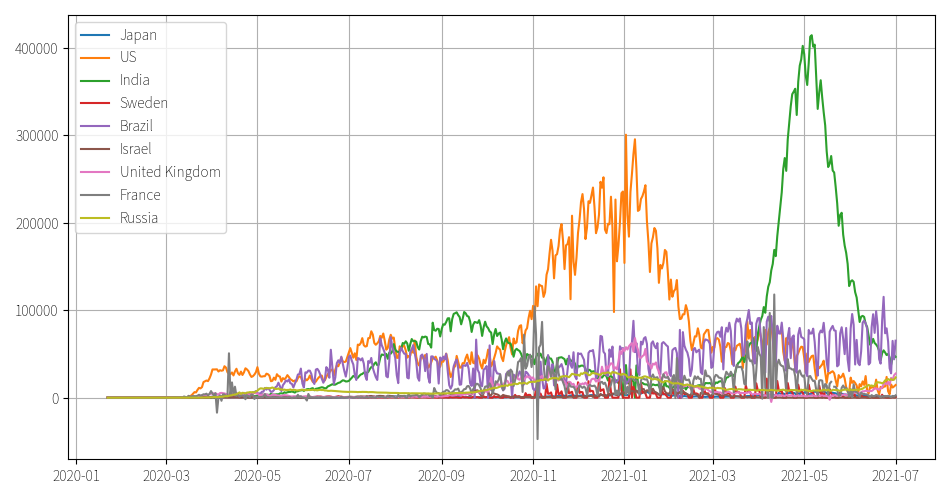

Japan
US
India
Sweden
Brazil
Israel
United Kingdom
France
Russia


In [49]:
# 主要国　新規感染者数　全期間
plt.figure(figsize=(9.5,5))
plt.grid()
dates = c_trans["date"].unique()
for c in countries["country"]:
    print(c)
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["inc_count"],label=c, fmt="-")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


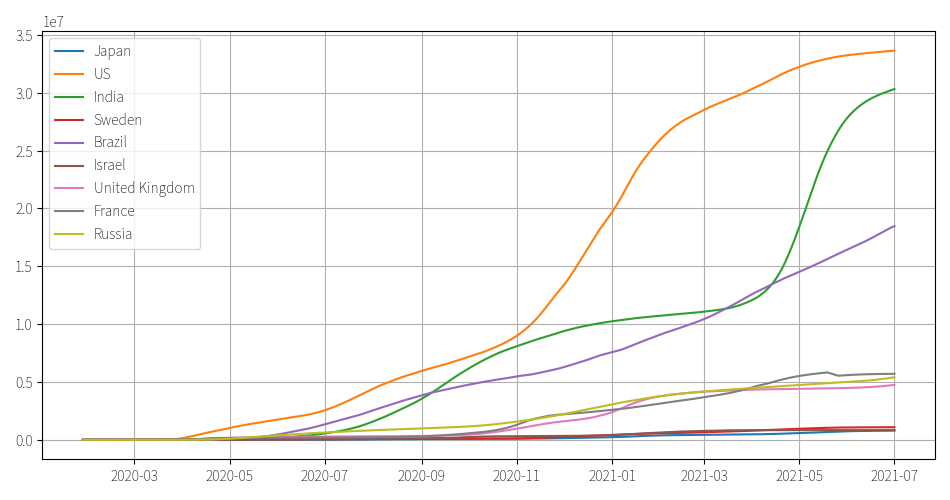

Japan
US
India
Sweden
Brazil
Israel
United Kingdom
France
Russia


In [50]:
# 主要国　新規感染者数７日間移動平均　全期間
plt.figure(figsize=(9.5,5))
plt.grid()
dates = c_trans["date"].unique()
for c in countries["country"]:
    print(c)
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["cnt_move_ave7"],label=c, fmt="-")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


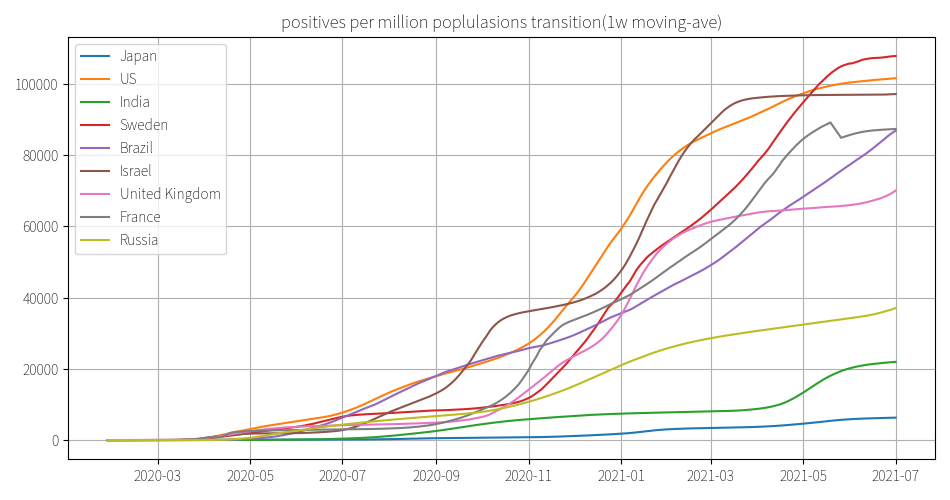

In [51]:
# 主要国　１００万人あたり感染者数累計 全期間　７日間移動平均
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("positives per million poplulasions transition(1w moving-ave)")
dates = c_trans["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["cnt_move_ave7_milpop"],label=c, fmt="-")
    
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


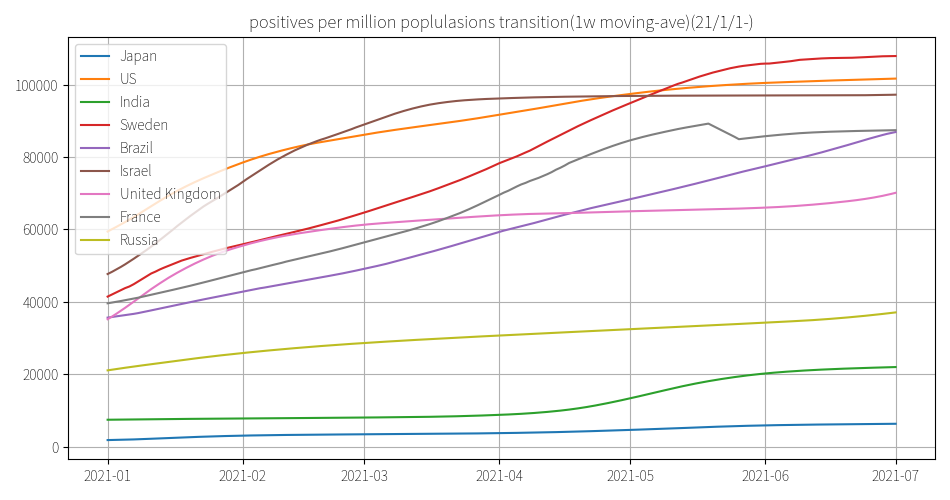

In [52]:
# 主要国　１００万人あたり感染者数累計 1月以降　７日間移動平均
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("positives per million poplulasions transition(1w moving-ave)(21/1/1-)")
dates = c_trans.loc[c_trans["date"]>="2021-01-01"]["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans.loc[(c_trans["country"]==c) & (c_trans["date"]>="2021-01-01")]["cnt_move_ave7_milpop"],label=c, fmt="-")
    
plt.legend()
plt.tight_layout()

## 人口当たりの新規感染者数

In [53]:
# 主要国　１００万人あたり新規感染者数 全期間　７日間移動平均
"""
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("increase positives per million poplulasions transition(1w moving-ave)")
dates = c_trans["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["inc_move_ave7_milpop"],label=c, fmt="-")
    plt.text(dates.max(),c_trans.loc[(c_trans["country"]==c) & (c_trans["date"]==dates.max())]["inc_move_ave7_milpop"],c,fontsize=8)

plt.legend()
plt.tight_layout()
"""

'\nplt.figure(figsize=(9.5,5))\nplt.grid()\nplt.title("increase positives per million poplulasions transition(1w moving-ave)")\ndates = c_trans["date"].unique()\nfor c in countries["country"]:\n    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["inc_move_ave7_milpop"],label=c, fmt="-")\n    plt.text(dates.max(),c_trans.loc[(c_trans["country"]==c) & (c_trans["date"]==dates.max())]["inc_move_ave7_milpop"],c,fontsize=8)\n\nplt.legend()\nplt.tight_layout()\n'

## 人口100万人当たりの新規感染者数（3月以降）

<IPython.core.display.Javascript object>


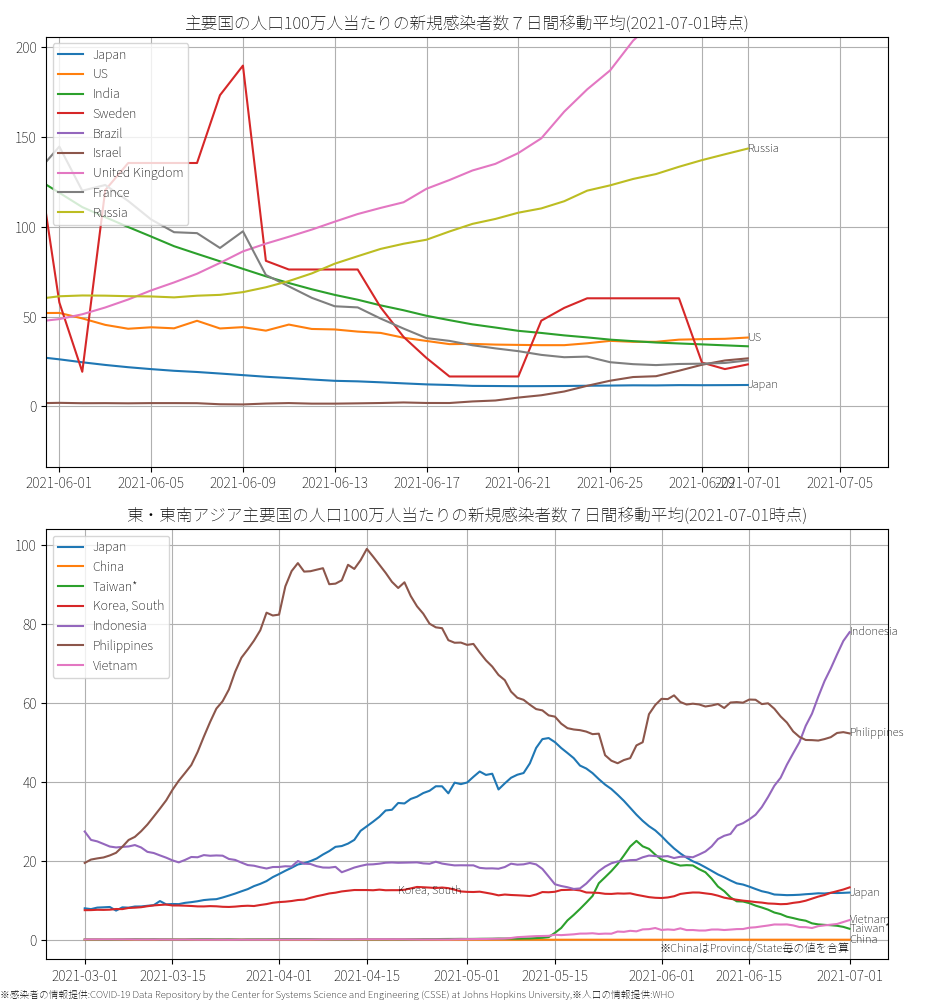

In [54]:
# 主要国　１００万人あたり感染者数累計 3月以降　７日間移動平均
fig=plt.figure(figsize=(9.5,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.grid()
plt.title("主要国の人口100万人当たりの新規感染者数７日間移動平均({}時点)".format(latest_date_str))
chart_data = c_trans[c_trans.date >= "2021-03-01"]
dates = chart_data["date"].unique()
for i,cr in countries.iterrows():
    c = cr["country"]
    text_disp_date = pd.to_datetime(cr["text_disp_date"]) if cr["text_disp_date"]!="" else dates.max()
    plt.plot_date(dates,chart_data.loc[chart_data["country"]==c]["inc_move_ave7_milpop"],label=c, fmt="-")
#    plt.text(dates.max(),chart_data.loc[(chart_data["country"]==c) & (chart_data["date"]==dates.max())]["inc_move_ave7_milpop"],c
    plt.text(text_disp_date,chart_data.loc[(chart_data["country"]==c) & (chart_data["date"]==text_disp_date)]["inc_move_ave7_milpop"],c
            ,fontsize=8,va="center")
plt.legend(bbox_to_anchor=(0, 1),loc='upper left', fontsize=9)

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.grid()
plt.title("東・東南アジア主要国の人口100万人当たりの新規感染者数７日間移動平均({}時点)".format(latest_date_str))
chart_data = e_a_trans[e_a_trans.date >= "2021-03-01"]
dates = chart_data["date"].unique()
for i,cr in e_asia_c.iterrows():
    c = cr["country"]
    text_disp_date = pd.to_datetime(cr["text_disp_date"]) if cr["text_disp_date"]!="" else dates.max()
    plt.plot_date(dates,chart_data.loc[chart_data["country"]==c]["inc_move_ave7_milpop"],label=c, fmt="-")
#    plt.text(dates.max(),chart_data.loc[(chart_data["country"]==c) & (chart_data["date"]==dates.max())]["inc_move_ave7_milpop"],c
    plt.text(text_disp_date,chart_data.loc[(chart_data["country"]==c) & (chart_data["date"]==text_disp_date)]["inc_move_ave7_milpop"],c
             ,fontsize=8,va="center")
plt.legend(bbox_to_anchor=(0, 1),loc='upper left', fontsize=9)
plt.text(dates.max(),-1,"※ChinaはProvince/State毎の値を合算",ha="right",va="top",fontsize=8)

fig.text(0,0
         ,"※感染者の情報提供:COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,"\
         +"※人口の情報提供:WHO",
        fontsize=7,ha="left",va="bottom")
fig.tight_layout()


In [55]:
fig.savefig("out/covid-global-countries-transition.png")